In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

D:\AI\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### 加载数据

In [2]:
data = np.load('../data/data_with_labels.npz')
data.keys()

['arr_0', 'arr_1']

In [3]:
data['arr_0'].shape

(2790, 36, 36)

In [4]:
data['arr_1'].shape

(2790,)

In [5]:
train = data['arr_0'] / 255.
labels = data['arr_1']

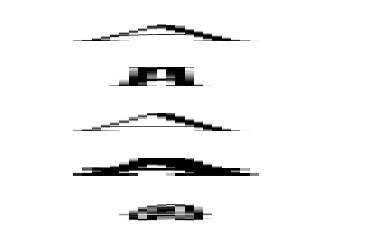

In [6]:
f, plts = plt.subplots(5, sharex=True)
c = 91
for i in range(5):
    plts[i].pcolor(train[c + i * 558],cmap=plt.cm.gray_r)
    plts[i].axis('off')
plt.show()

### 处理数据

- 独热编码

In [7]:
oh = OneHotEncoder(sparse=False)
labels = oh.fit_transform(labels.reshape(-1, 1))
labels[-1]

array([0., 0., 0., 0., 1.])

- 分割数据,10%作为测试数据,其余做训练数据

In [8]:
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.1, random_state=666)

### 搭建模型

- 一层神经网络

In [9]:
SHAPE = 36*36
CLASSES = 5
x = tf.placeholder("float", [None, SHAPE]) #图像是36*36像素
y_ = tf.placeholder("float", [None, CLASSES]) #分为5个类别

W = tf.Variable(tf.zeros([SHAPE, CLASSES])) #权重
b = tf.Variable(tf.zeros([CLASSES])) #偏置

In [10]:
y = tf.nn.softmax(tf.matmul(x, W) + b)
#损失函数
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y + 1e-50, labels=y_))
#梯度下降优化
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.02).minimize(loss)

#准确率
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

### 训练模型

In [11]:
init = tf.global_variables_initializer()
epochs = 20000
train_acc = []
test_acc = []

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(epochs):
        sess.run(train_step, feed_dict={x : X_train.reshape(-1, 36 * 36), y_ : y_train})
        if i % 100 == 0:
            trainacc = sess.run(accuracy, feed_dict={x : X_train.reshape(-1, 36 * 36), y_ : y_train})
            train_acc.append(trainacc)
            testacc = sess.run(accuracy, feed_dict={x : X_test.reshape(-1, 36 * 36), y_ : y_test})
            test_acc.append(testacc)
            print("step: %4d, train_acc %.6f, test_acc %.6f" % (i, trainacc, testacc))

step:    0, train_acc 0.199522, test_acc 0.204301
step:  100, train_acc 0.199522, test_acc 0.204301
step:  200, train_acc 0.221426, test_acc 0.236559
step:  300, train_acc 0.285942, test_acc 0.286738
step:  400, train_acc 0.323775, test_acc 0.333333
step:  500, train_acc 0.339307, test_acc 0.365591
step:  600, train_acc 0.350856, test_acc 0.383513
step:  700, train_acc 0.359618, test_acc 0.397849
step:  800, train_acc 0.368777, test_acc 0.397849
step:  900, train_acc 0.381920, test_acc 0.405018
step: 1000, train_acc 0.398248, test_acc 0.426523
step: 1100, train_acc 0.427320, test_acc 0.437276
step: 1200, train_acc 0.456392, test_acc 0.462366
step: 1300, train_acc 0.485464, test_acc 0.483871
step: 1400, train_acc 0.511350, test_acc 0.501792
step: 1500, train_acc 0.532059, test_acc 0.508961
step: 1600, train_acc 0.556352, test_acc 0.505376
step: 1700, train_acc 0.573477, test_acc 0.523297
step: 1800, train_acc 0.590203, test_acc 0.544803
step: 1900, train_acc 0.602549, test_acc 0.548387


step: 16300, train_acc 0.780566, test_acc 0.698925
step: 16400, train_acc 0.781362, test_acc 0.698925
step: 16500, train_acc 0.781760, test_acc 0.698925
step: 16600, train_acc 0.781760, test_acc 0.698925
step: 16700, train_acc 0.781760, test_acc 0.698925
step: 16800, train_acc 0.781760, test_acc 0.698925
step: 16900, train_acc 0.781760, test_acc 0.698925
step: 17000, train_acc 0.782557, test_acc 0.698925
step: 17100, train_acc 0.782557, test_acc 0.698925
step: 17200, train_acc 0.782955, test_acc 0.698925
step: 17300, train_acc 0.782955, test_acc 0.698925
step: 17400, train_acc 0.783751, test_acc 0.698925
step: 17500, train_acc 0.784150, test_acc 0.698925
step: 17600, train_acc 0.784150, test_acc 0.698925
step: 17700, train_acc 0.784150, test_acc 0.698925
step: 17800, train_acc 0.784548, test_acc 0.698925
step: 17900, train_acc 0.785344, test_acc 0.698925
step: 18000, train_acc 0.785743, test_acc 0.698925
step: 18100, train_acc 0.786539, test_acc 0.706093
step: 18200, train_acc 0.787734

- 查看Accuracy

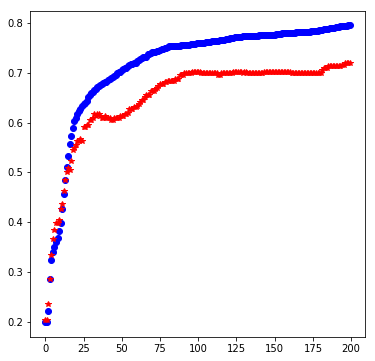

In [12]:
plt.figure(figsize=(6,6))
plt.plot(train_acc,'bo')
plt.plot(test_acc,'r*')
plt.show()